In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./dataset/seattle-weather.csv')

In [4]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


## 🔍 Section 1: **Line Plots**

##### 1. Plot the daily **maximum temperature** over time.
    - Add appropriate labels and title.
    - Rotate x-axis labels for clarity.

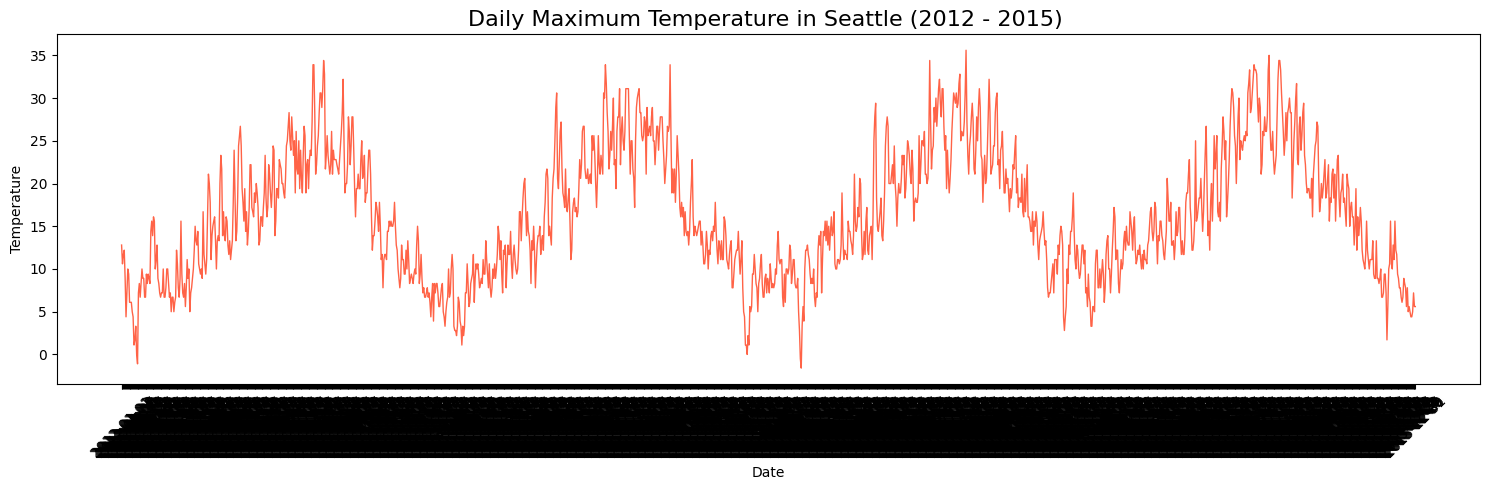

In [5]:
plt.figure(figsize=(15,5))

plt.plot(df['date'],df['temp_max'],color='tomato',linewidth=1)

plt.title('Daily Maximum Temperature in Seattle (2012 - 2015) ',fontsize=16)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2. Plot **minimum and maximum temperatures** on the same line plot.
    - Add a legend to distinguish them.

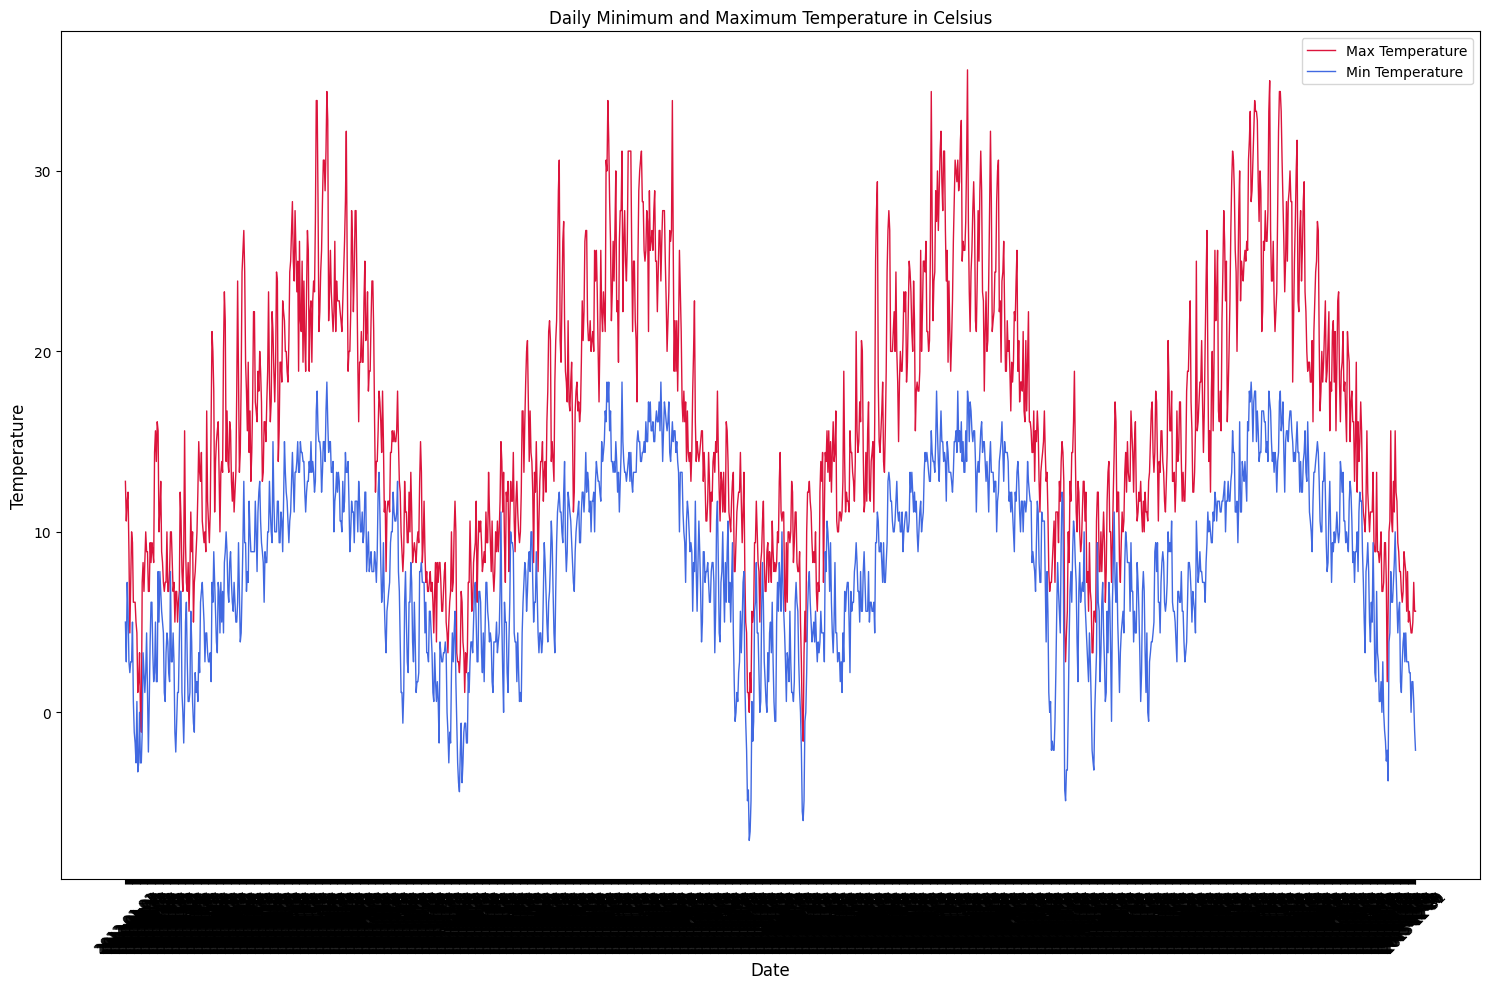

In [6]:
plt.figure(figsize=(15,10))
plt.plot(df['date'],df['temp_max'],color='crimson',label='Max Temperature',linewidth=1)
plt.plot(df['date'],df['temp_min'],color='royalblue',label='Min Temperature',linewidth=1)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Temperature",fontsize=12)
plt.title("Daily Minimum and Maximum Temperature in Celsius")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

##### Plot the rolling 30-day average of maximum temperature.

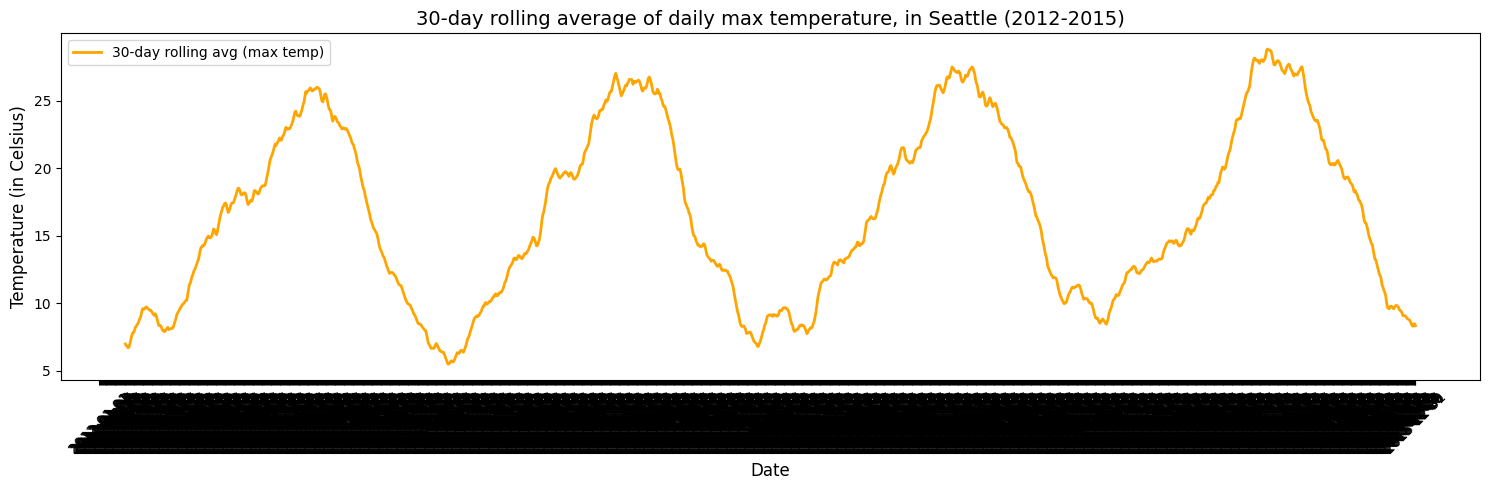

In [7]:
df = df.sort_values('date')

df['temp_max_rolling'] = df['temp_max'].rolling(window=30).mean()

plt.figure(figsize=(15,5))
plt.plot(df['date'],df['temp_max_rolling'],color='orange',label='30-day rolling avg (max temp)',linewidth=2)

plt.title("30-day rolling average of daily max temperature, in Seattle (2012-2015)",fontsize=14)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Temperature (in Celsius)",fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 🌧️ Section 2: **Bar Charts**

##### 1. Count the number of days for each **weather type** and show it in a bar chart.
    - Add color for each bar and annotate bar heights.

In [8]:
weather_counts = df['weather'].value_counts()

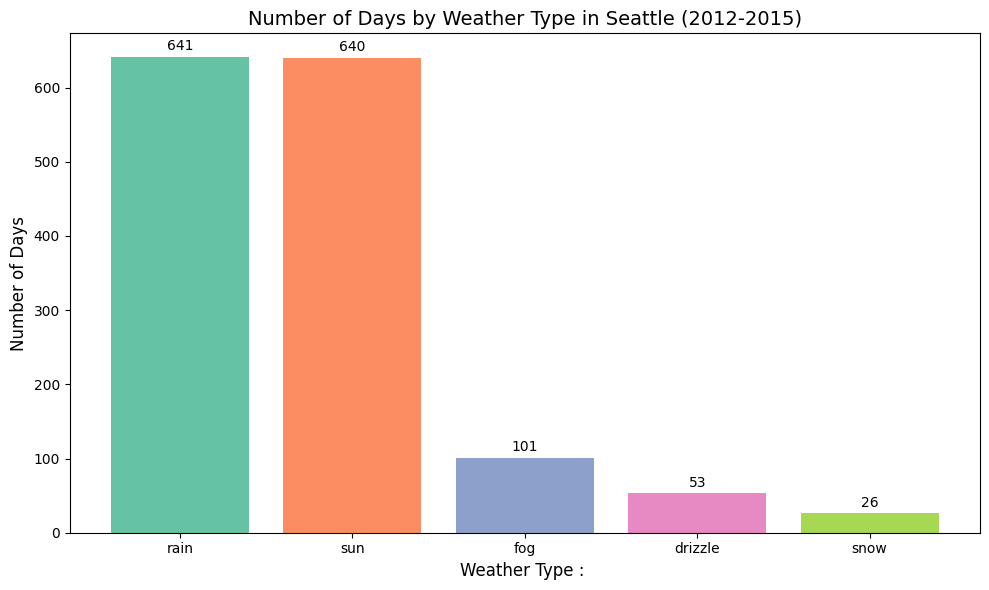

In [9]:
plt.figure(figsize=(10,6))
bars = plt.bar(weather_counts.index,weather_counts.values,color=plt.cm.Set2.colors)

plt.title('Number of Days by Weather Type in Seattle (2012-2015)',fontsize=14)
plt.xlabel('Weather Type : ',fontsize=12)
plt.ylabel('Number of Days',fontsize=12)

for bar in bars : 
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,height+5,f'{int(height)}',ha='center',va='bottom',fontsize=10)
    
plt.tight_layout()
plt.show()

##### 2. Plot a bar chart showing **average precipitation** for each month.
    - Extract month from the date column.
    - Group by month and calculate the mean precipitation.

In [10]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather',
       'temp_max_rolling'],
      dtype='object')

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df['month'] = df['date'].dt.month

In [13]:
df.groupby('month')['precipitation'].mean()

month
1     3.758065
2     3.734513
3     4.888710
4     3.128333
5     1.673387
6     1.107500
7     0.388710
8     1.320161
9     1.962500
10    4.059677
11    5.354167
12    5.021774
Name: precipitation, dtype: float64

In [14]:
df['month_name'] = df['date'].dt.month_name()
df['month_name']

0        January
1        January
2        January
3        January
4        January
          ...   
1456    December
1457    December
1458    December
1459    December
1460    December
Name: month_name, Length: 1461, dtype: object

In [22]:
values = df.groupby('month')[['month_name']]
values

In [15]:
monthly_average = df.groupby('month')[['precipitation']].mean().sort_index()

In [16]:
monthly_average.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

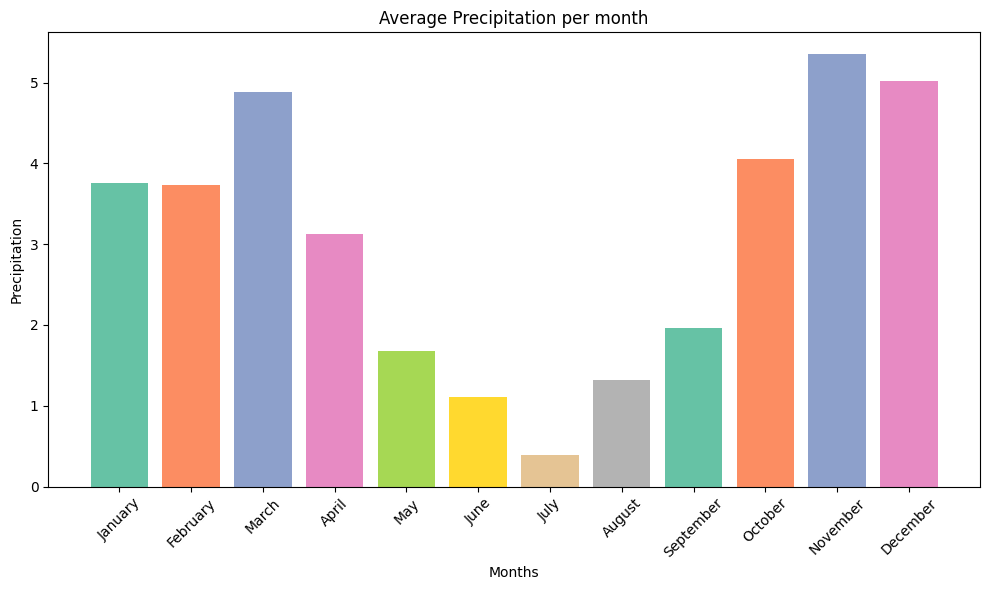

In [18]:
import calendar

monthly_average.index = monthly_average.index.map(lambda x : calendar.month_name[x])

plt.figure(figsize=(10,6))
bars = plt.bar(monthly_average.index,monthly_average['precipitation'],color=plt.cm.Set2.colors)
plt.title("Average Precipitation per month")
plt.xlabel("Months")
plt.ylabel("Precipitation")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## 🌡️ Section 3: **Scatter Plots**

##### 1. Create a scatter plot of **maximum temperature vs. wind speed**.
    - Color the points by weather type.
    - Add transparency (`alpha`) for overlapping points.

In [23]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather',
       'temp_max_rolling', 'month', 'month_name'],
      dtype='object')

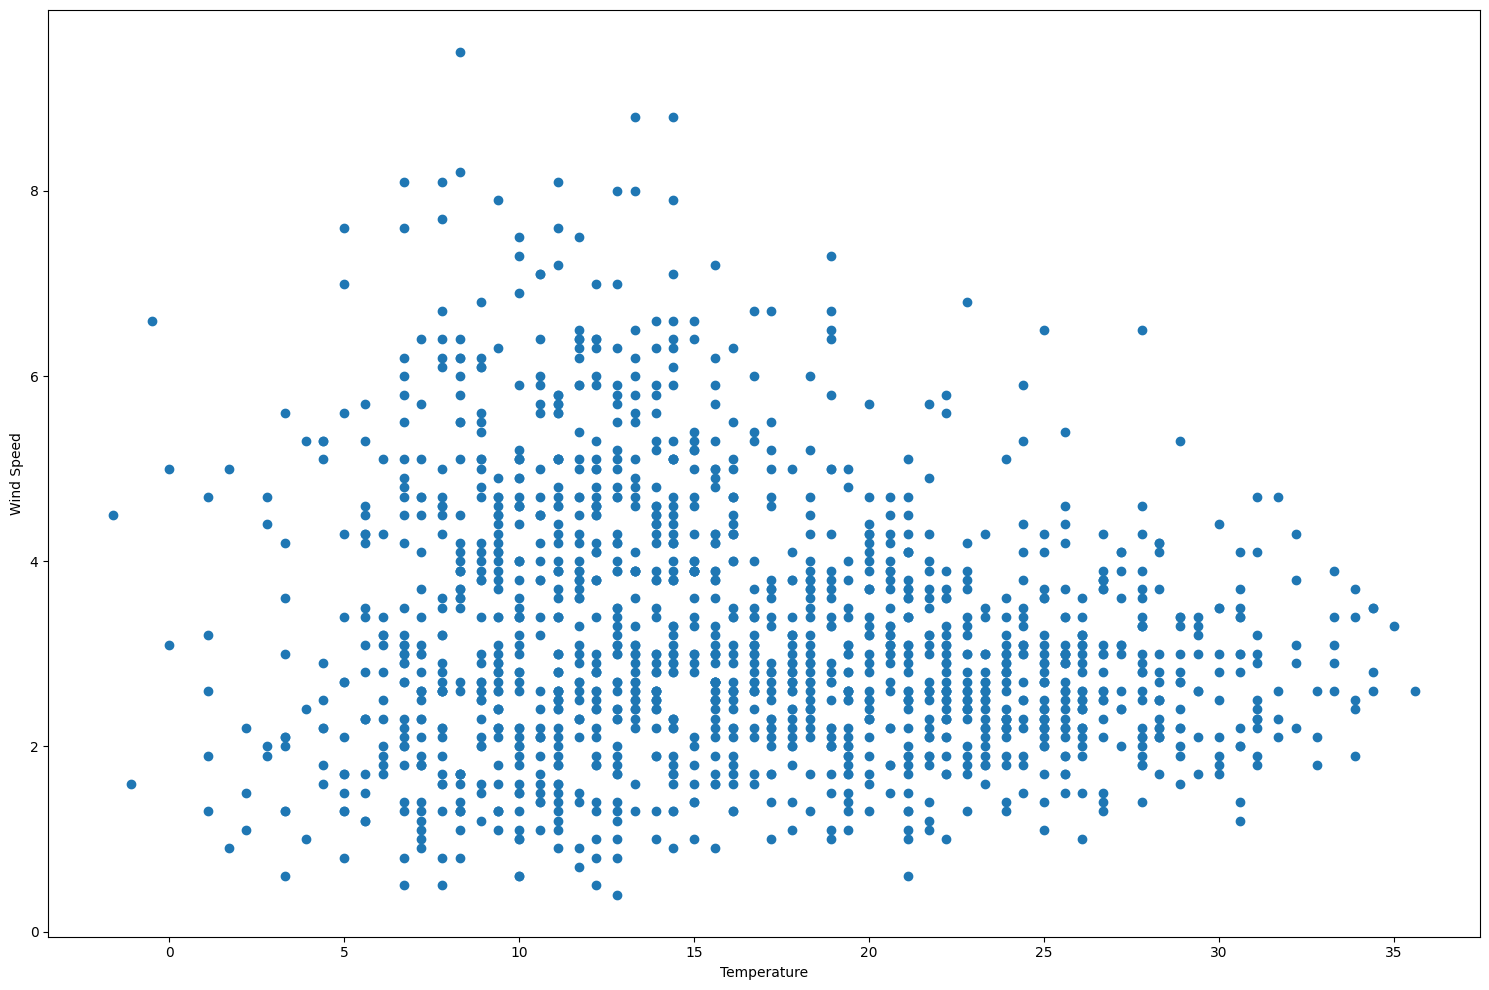

In [24]:
plt.figure(figsize=(15,10))
plt.scatter(df['temp_max'],df['wind'])
plt.xlabel('Temperature')
plt.ylabel("Wind Speed")
plt.tight_layout()
plt.show()

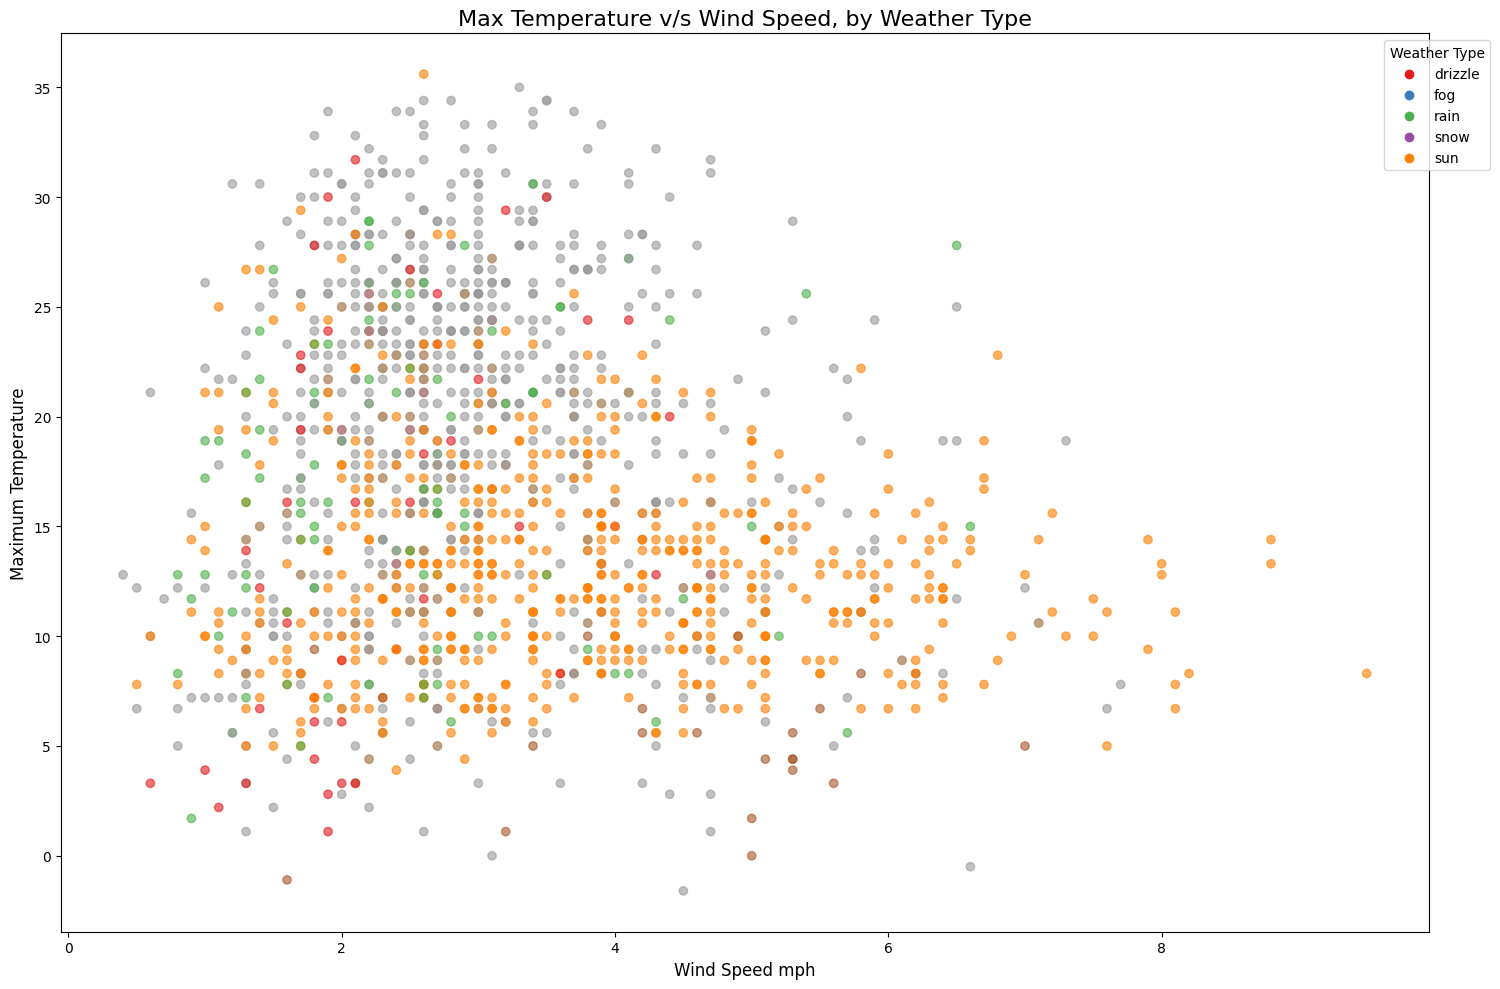

In [27]:
#### - Color the points by weather type.
#### - Add transparency (`alpha`) for overlapping points.


plt.figure(figsize=(15,10))
scatter = plt.scatter(df['wind'],
                      df['temp_max'],
                     c=pd.Categorical(df['weather']).codes,
                     cmap='Set1',
                     alpha=0.6)
plt.title('Max Temperature v/s Wind Speed, by Weather Type',fontsize=16)
plt.xlabel('Wind Speed mph',fontsize=12)
plt.ylabel('Maximum Temperature',fontsize=12)

weather_types = df['weather'].astype('category').cat.categories
colors = plt.cm.Set1.colors[:len(weather_types)]

for weather,color in zip(weather_types,colors):
    plt.scatter([],[],color=color,label=weather)
    
plt.legend(title='Weather Type',bbox_to_anchor=(1.05,1),loc='best')
plt.tight_layout()
plt.show()

##### Plot temp_max vs. precipitation and highlight days with more than 20 mm of rain in red.

In [30]:
heavy_rain = df['precipitation'] > 20

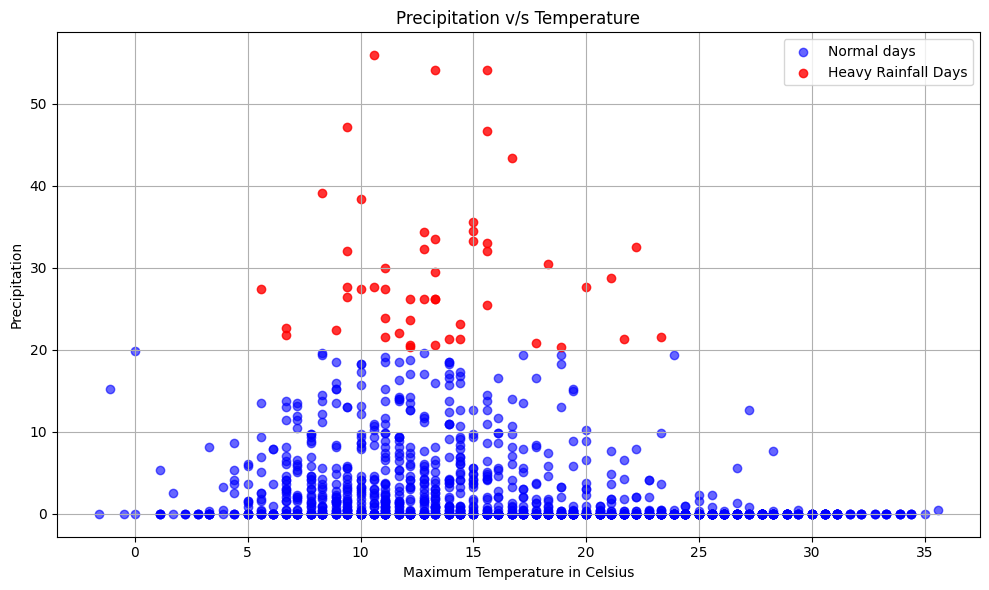

In [31]:
plt.figure(figsize=(10,6))

#Plot regular days
plt.scatter(df.loc[~heavy_rain,'temp_max'],
           df.loc[~heavy_rain,'precipitation'],
           label='Normal days',alpha=0.6,color='blue')


plt.scatter(df.loc[heavy_rain,'temp_max'],
           df.loc[heavy_rain,'precipitation'],
           label='Heavy Rainfall Days',alpha=0.8,color='red')

plt.xlabel('Maximum Temperature in Celsius')
plt.ylabel('Precipitation')
plt.title('Precipitation v/s Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🌈 Section 4: **Histograms and Boxplots**

##### 1. Plot a histogram of **wind speeds**.
    - Use bins = 20.
    - Add KDE curve using seaborn (optional).

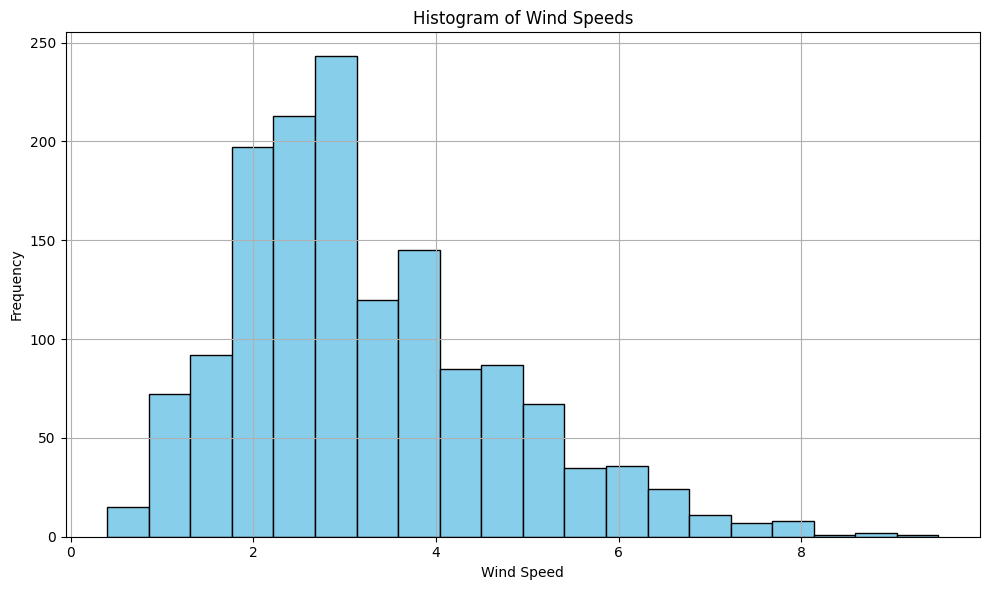

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(df['wind'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Histogram of Wind Speeds')
plt.grid(True)
plt.tight_layout()
plt.show()


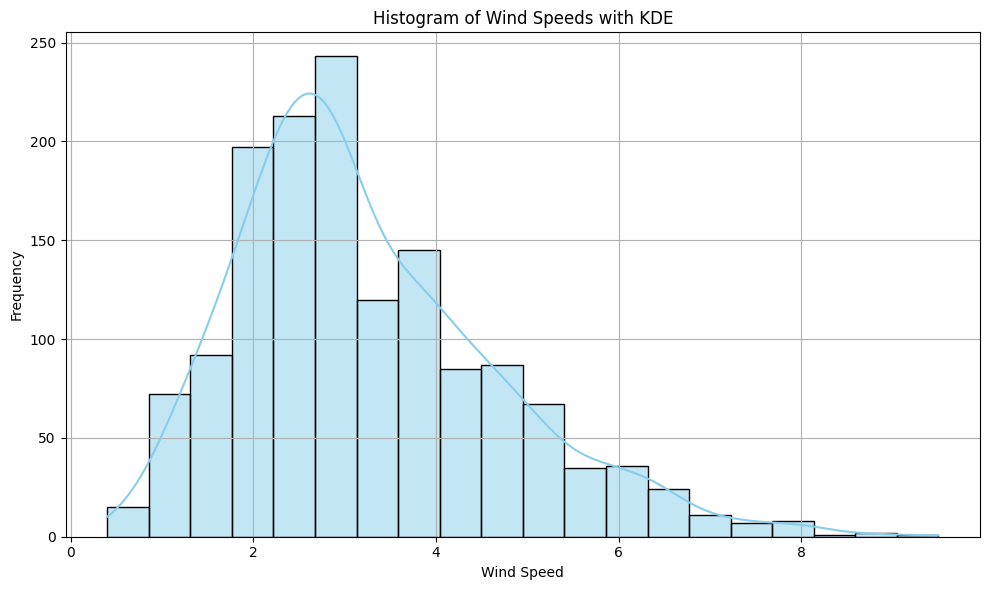

In [36]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['wind'],bins=20,kde=True,color='skyblue',edgecolor='black')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Histogram of Wind Speeds with KDE')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2. Create a **boxplot of temp_max grouped by weather type**.
    - Use horizontal orientation.
    - Add grid lines for clarity.

In [37]:
import matplotlib.pyplot as plt

weather_groups = df.groupby('weather')['temp_max'].apply(list)

weather_groups

weather
drizzle    [12.8, 6.7, 7.2, 12.8, 15.0, 16.1, 24.4, 19.4,...
fog        [27.8, 27.8, 19.4, 21.1, 9.4, 12.8, 13.9, 20.6...
rain       [10.6, 11.7, 12.2, 8.9, 4.4, 7.2, 9.4, 6.1, 8....
snow       [4.4, 1.1, 1.7, 3.3, 0.0, -1.1, 7.2, 5.0, 6.7,...
sun        [10.0, 6.1, 6.1, 5.0, 8.3, 14.4, 15.6, 13.9, 1...
Name: temp_max, dtype: object

In [ ]:
weather_labels = weather_groups.index.tolist()
temp_data = weather_groups.tolist()

plt.figure(figsize=(12,6))